In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('CollegePlacement.csv')

In [46]:
df.tail()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No
9999,CLG0060,109,9.41,9.77,8,No,3,5,5,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [5]:
df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


In [6]:
df.columns

Index(['College_ID', 'IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed', 'Placement'],
      dtype='object')

In [7]:
df.shape

(10000, 10)

In [8]:
df.isnull().sum()

College_ID                0
IQ                        0
Prev_Sem_Result           0
CGPA                      0
Academic_Performance      0
Internship_Experience     0
Extra_Curricular_Score    0
Communication_Skills      0
Projects_Completed        0
Placement                 0
dtype: int64

In [9]:
df['Placement'].value_counts()

Placement
No     8341
Yes    1659
Name: count, dtype: int64

<Axes: xlabel='Placement', ylabel='count'>

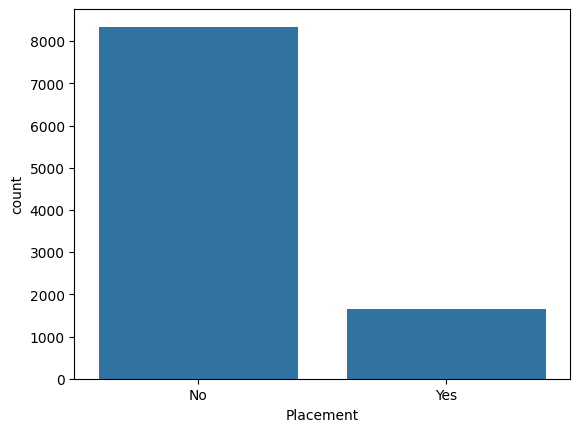

In [10]:
sns.countplot(x = df['Placement'])

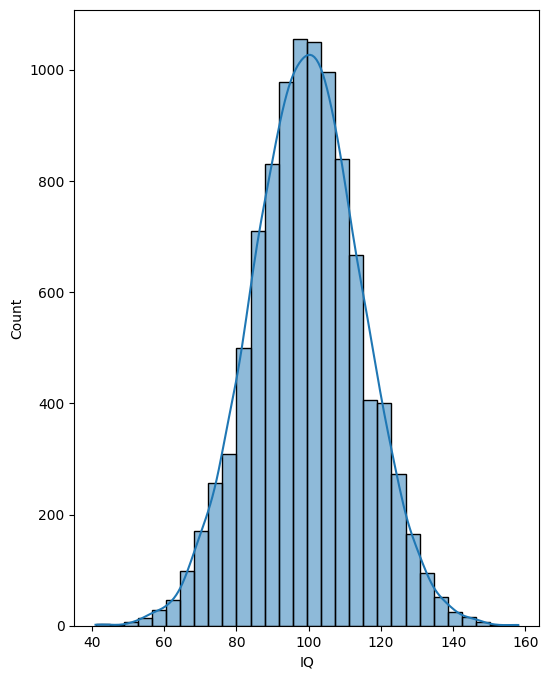

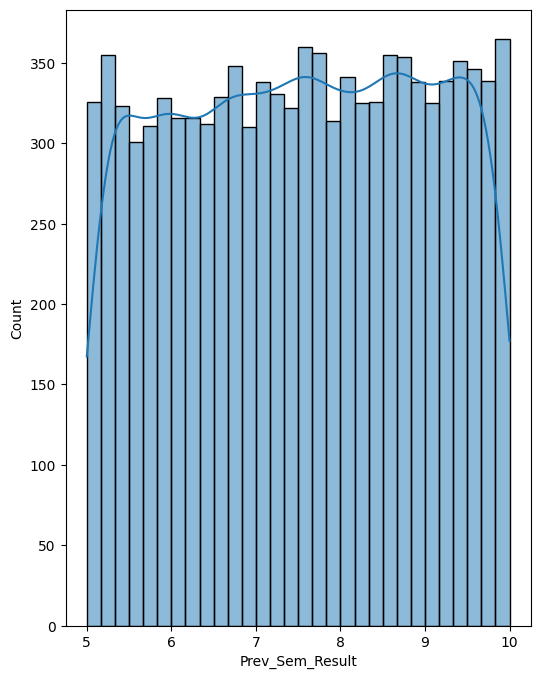

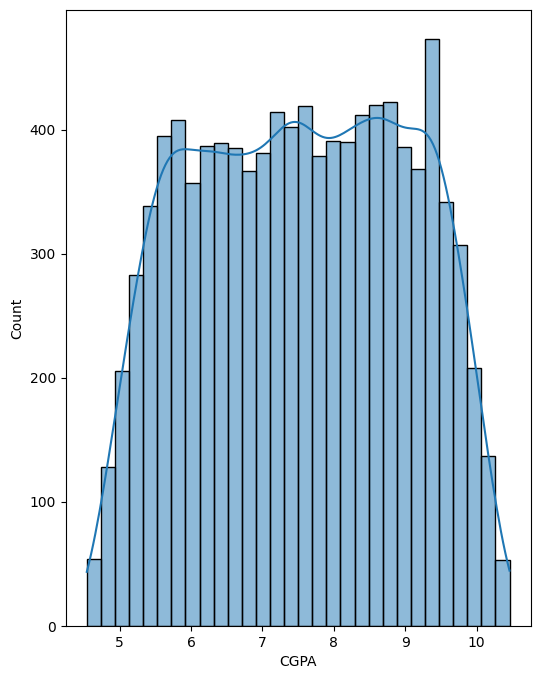

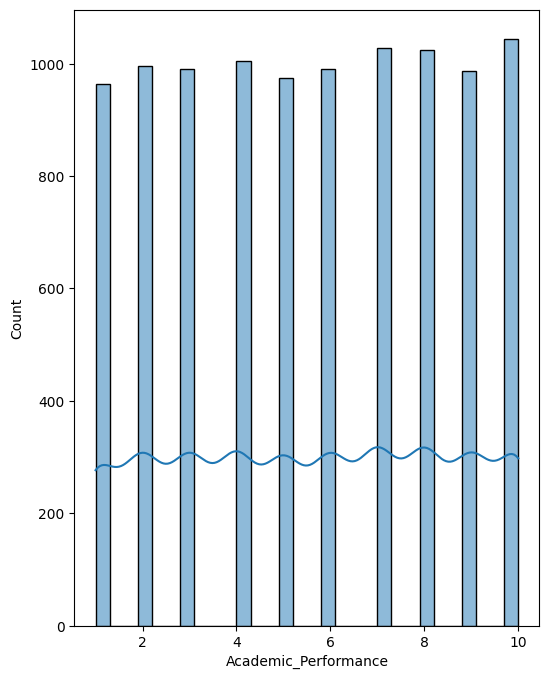

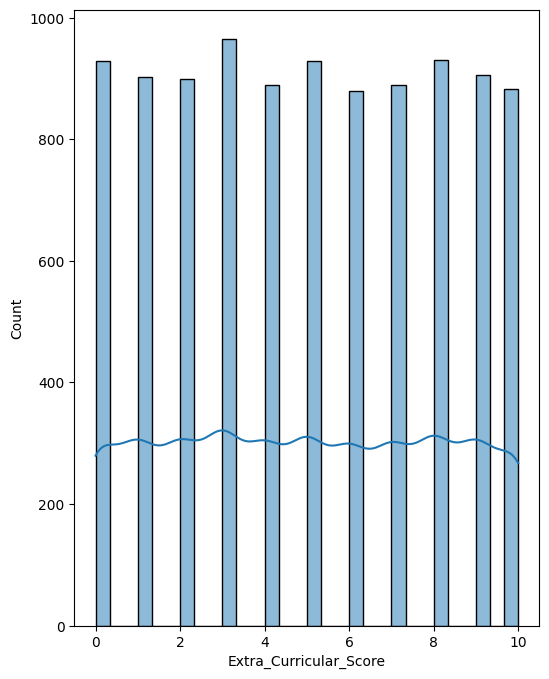

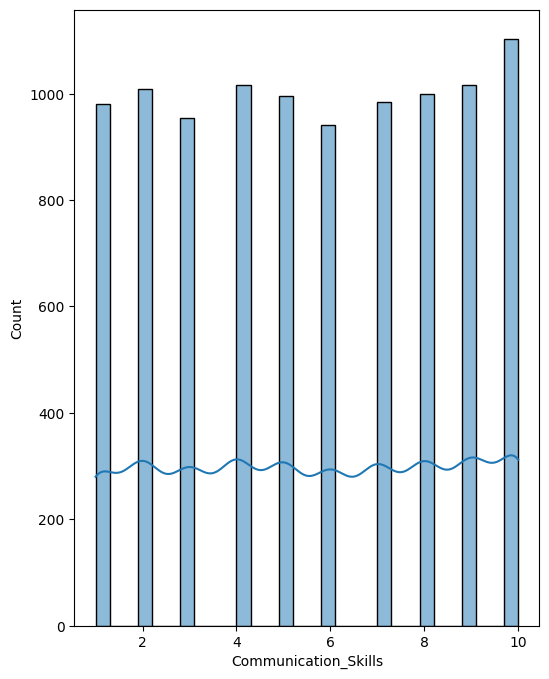

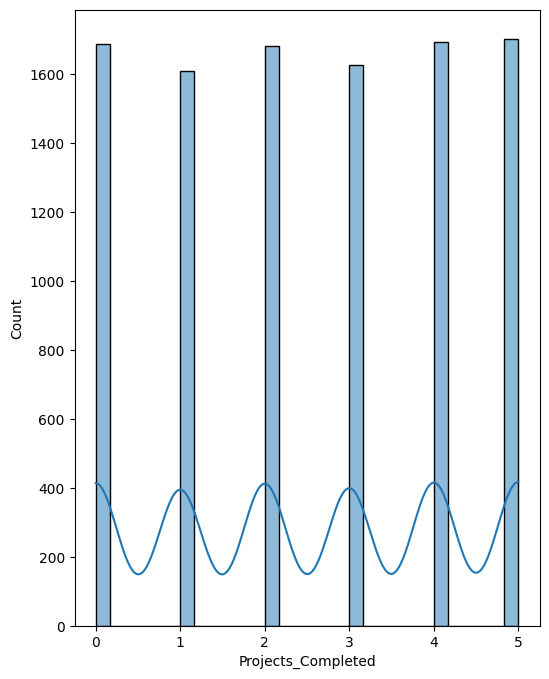

In [11]:
numeric_columns = ['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance', 'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed',]
for col in numeric_columns:
    plt.figure(figsize=(6,8))
    sns.histplot(df[col], kde = True, bins=30)

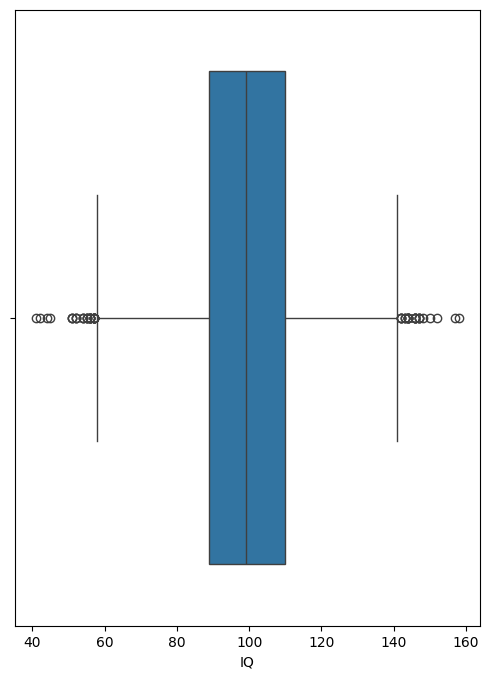

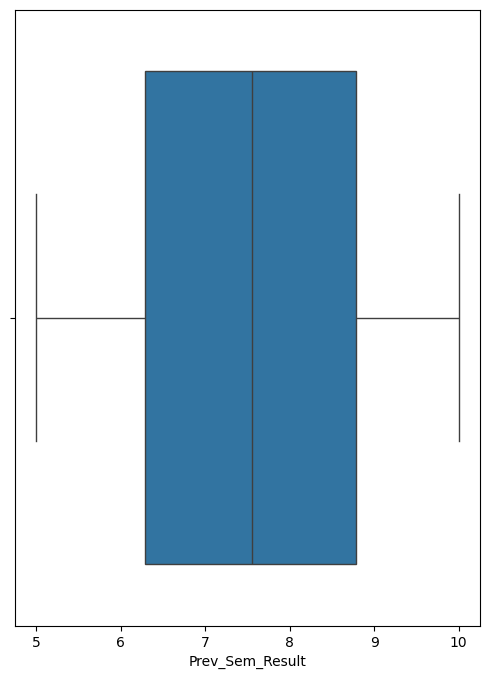

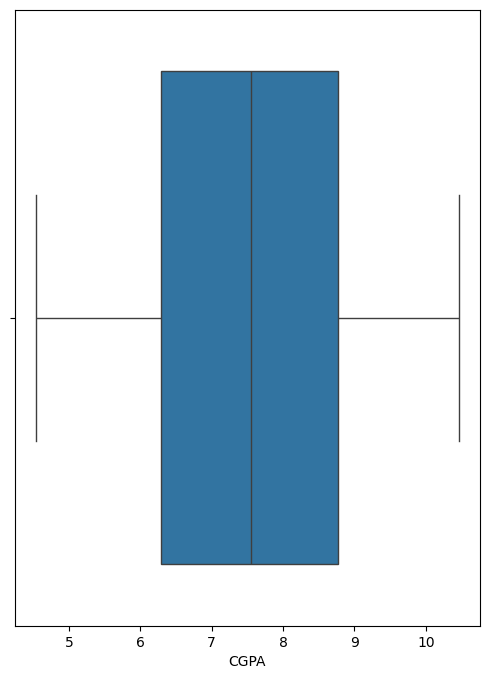

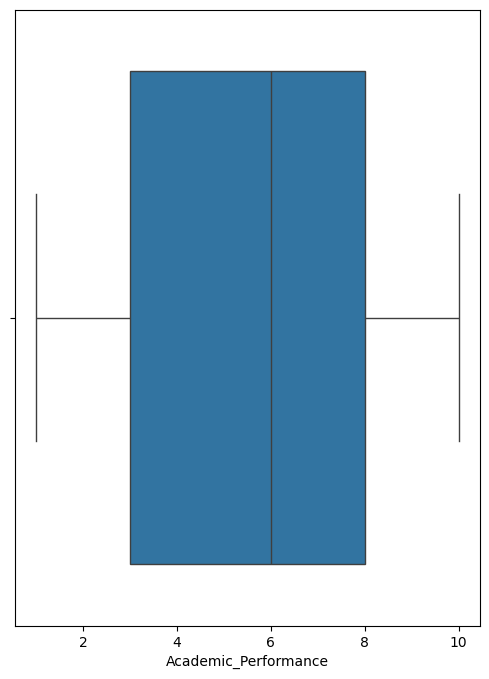

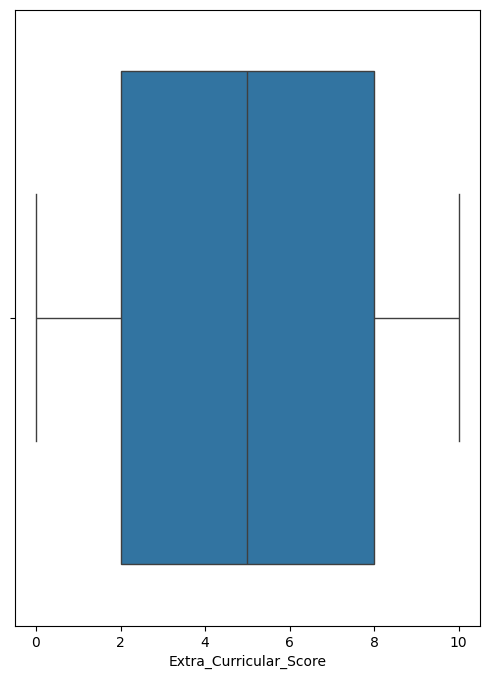

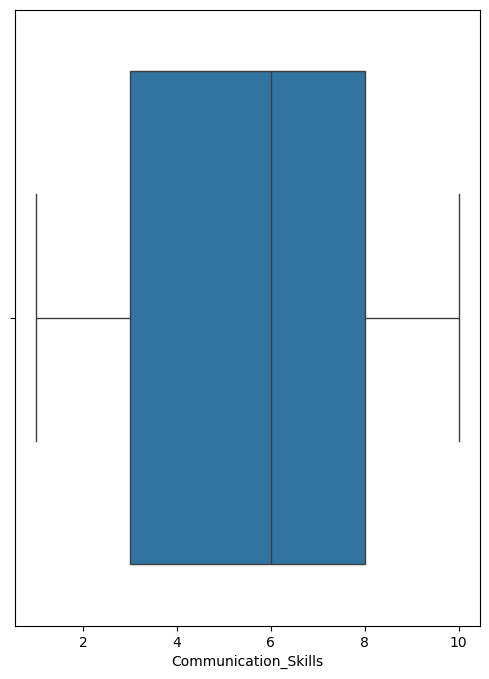

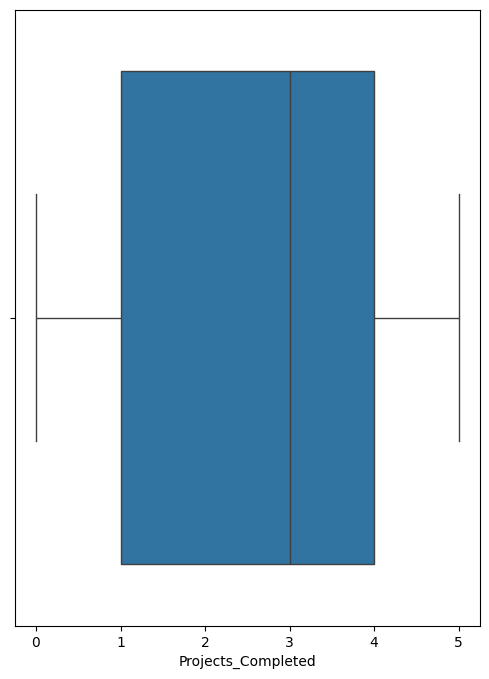

In [12]:
numeric_columns = ['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance', 'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed',]
for col in numeric_columns:
    plt.figure(figsize=(6,8))
    sns.boxplot(x=df[col])

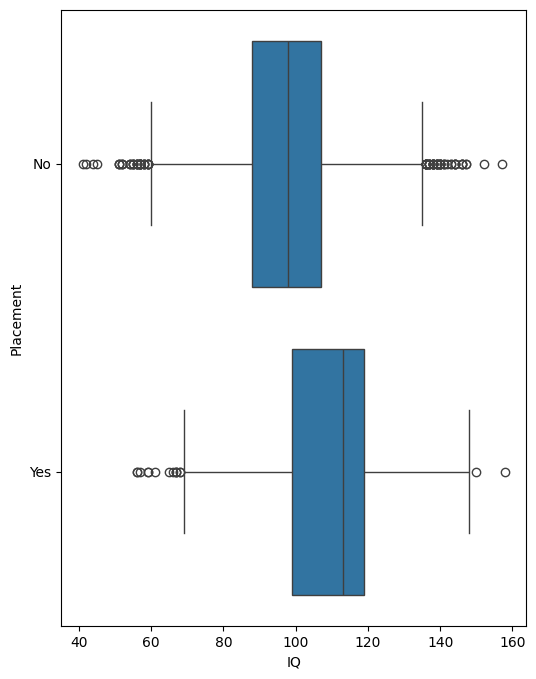

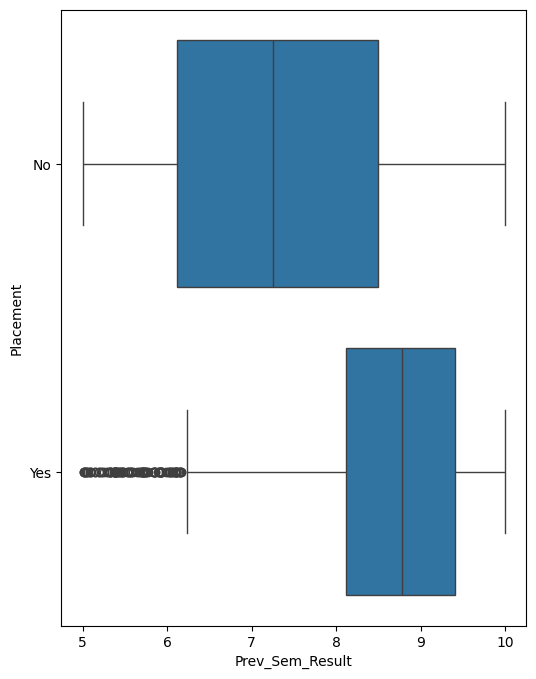

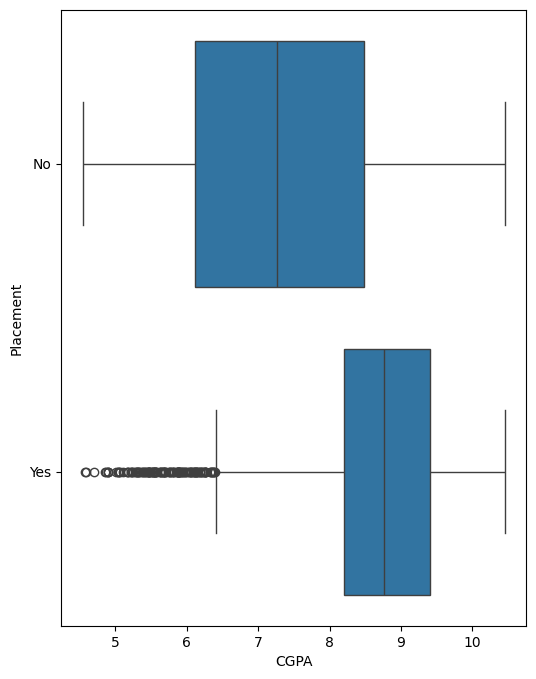

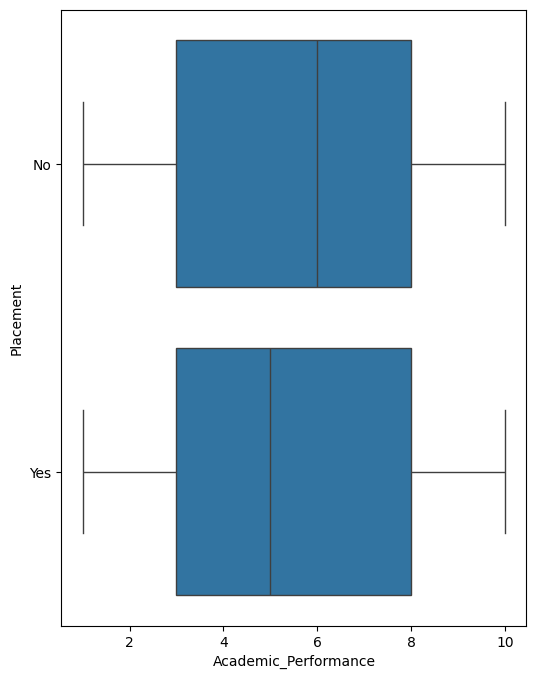

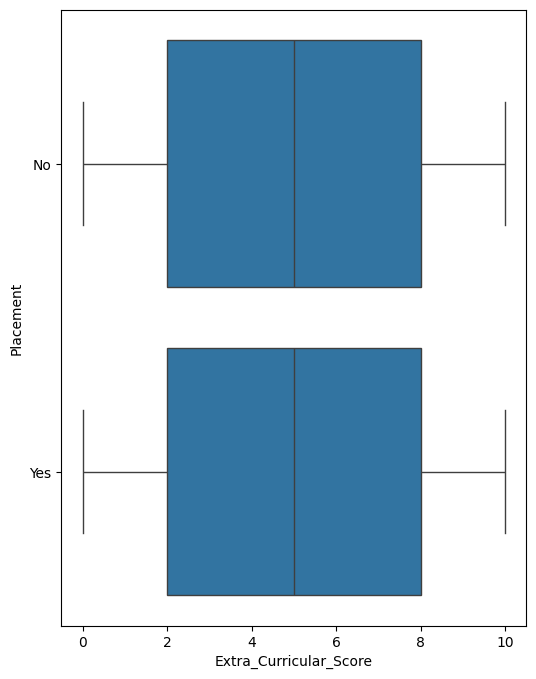

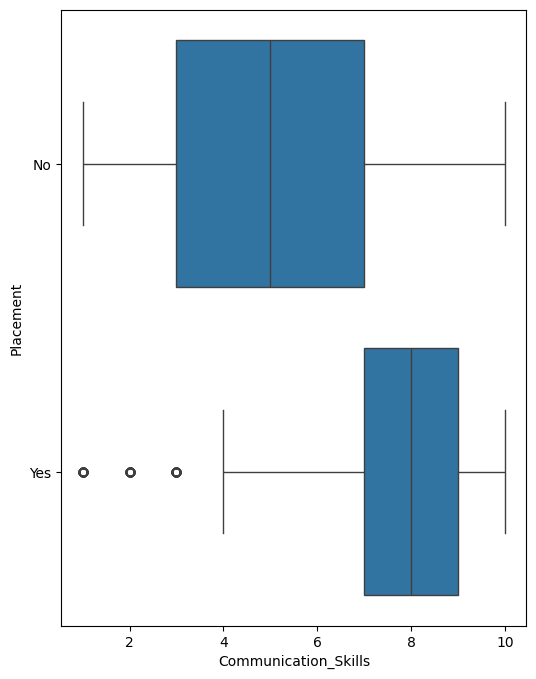

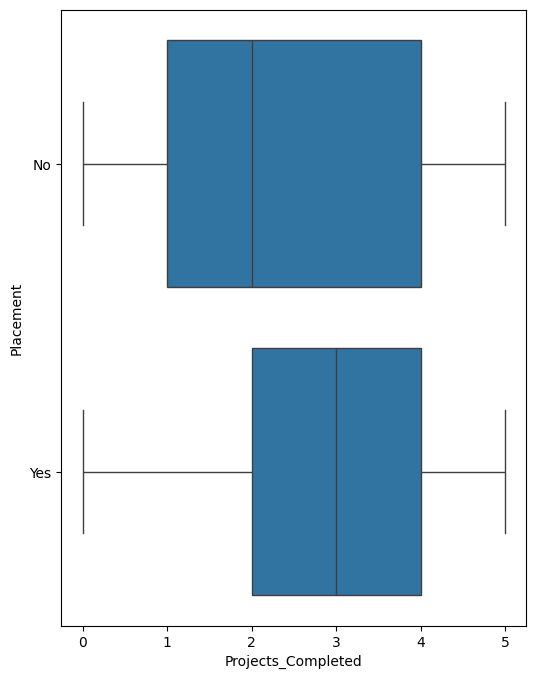

In [13]:
numeric_columns = ['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance', 'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed',]
for col in numeric_columns:
    plt.figure(figsize=(6,8))
    sns.boxplot(x=df[col], y=df['Placement'])

<Axes: >

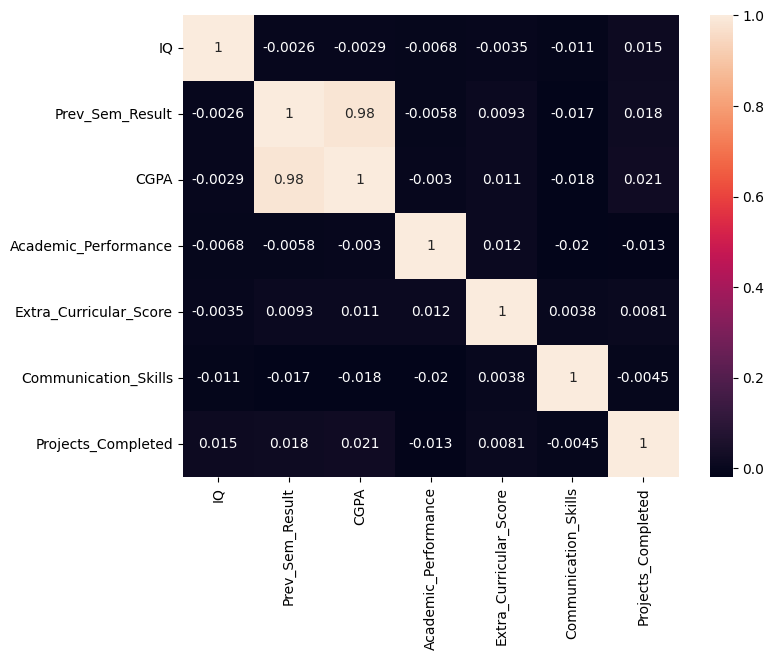

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [15]:
df_clean = df.copy()

In [16]:
df_clean.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [17]:
df_clean.drop_duplicates(inplace=True)

In [18]:
df_clean.shape

(10000, 10)

In [19]:
df_clean['Placement'].value_counts()

Placement
No     8341
Yes    1659
Name: count, dtype: int64

In [20]:
df_clean['Placement'] = df_clean['Placement'].map({'Yes':1, 'No':0})

In [21]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [22]:
df_clean['Internship_Experience'].value_counts()

Internship_Experience
No     6036
Yes    3964
Name: count, dtype: int64

In [23]:
df_clean['Internship_Experience'] = df_clean['Internship_Experience'].map({'Yes':1, 'No':0})

In [24]:
df_clean.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,0,8,8,4,0
1,CLG0061,97,5.52,5.37,8,0,7,8,0,0
2,CLG0036,109,5.36,5.83,9,0,3,1,1,0
3,CLG0055,122,5.47,5.75,6,1,1,6,1,0
4,CLG0004,96,7.91,7.69,7,0,8,10,2,0


<Axes: >

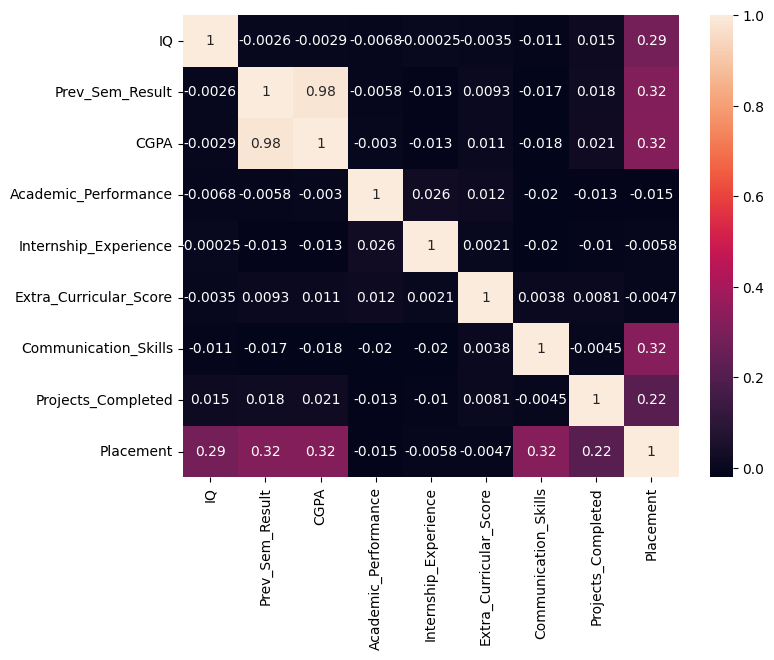

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True)

In [26]:
df_clean.columns

Index(['College_ID', 'IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed', 'Placement'],
      dtype='object')

In [27]:
df['Projects_Completed'].value_counts()

Projects_Completed
5    1702
4    1693
0    1688
2    1681
3    1627
1    1609
Name: count, dtype: int64

In [28]:
from scipy.stats import pearsonr # Import pearsonr function to calculate Pearson correlation coefficient
selected_features = ['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed']

correalation = {
    feature: pearsonr(df_clean[feature], df_clean['Placement'])[0]
    for feature in selected_features
}
correalation_df = pd.DataFrame(list(correalation.items()), columns=['Feature', ' Pearson Correlation'])
correalation_df.sort_values(by=' Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
6,Communication_Skills,0.323155
2,CGPA,0.321607
1,Prev_Sem_Result,0.317896
0,IQ,0.285914
7,Projects_Completed,0.217499
5,Extra_Curricular_Score,-0.004740
4,Internship_Experience,-0.005841
3,Academic_Performance,-0.014920


In [29]:
df_clean.drop(columns = "College_ID", inplace = True)

In [30]:
df_clean = df_clean.astype(int)

In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   IQ                      10000 non-null  int64
 1   Prev_Sem_Result         10000 non-null  int64
 2   CGPA                    10000 non-null  int64
 3   Academic_Performance    10000 non-null  int64
 4   Internship_Experience   10000 non-null  int64
 5   Extra_Curricular_Score  10000 non-null  int64
 6   Communication_Skills    10000 non-null  int64
 7   Projects_Completed      10000 non-null  int64
 8   Placement               10000 non-null  int64
dtypes: int64(9)
memory usage: 703.3 KB


In [32]:
X = df_clean.drop(columns="Placement", axis = 1)
y = df_clean['Placement']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=3),
    "SVM (RBF Kernel)": SVC(probability=True)
}

In [37]:
results = []

In [38]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'F1 Score': round(f1, 4)
    })

In [39]:
results

[{'Model': 'Logistic Regression', 'Accuracy': 0.9075, 'F1 Score': 0.6859},
 {'Model': 'KNN', 'Accuracy': 0.952, 'F1 Score': 0.8436},
 {'Model': 'Naive Bayes', 'Accuracy': 0.899, 'F1 Score': 0.6622},
 {'Model': 'Decision Tree', 'Accuracy': 0.965, 'F1 Score': 0.9008},
 {'Model': 'SVM (RBF Kernel)', 'Accuracy': 0.958, 'F1 Score': 0.8641}]

In [40]:
import joblib
joblib.dump(models, 'Decision_Tree_model_joblib.pkl') 
joblib.dump(scaler,'scaler.pkl')
joblib.dump(X.columns.tolist(),'columns.pkl')


['columns.pkl']

In [41]:
X.columns

Index(['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed'],
      dtype='object')

In [43]:
X['IQ'].min()

np.int64(41)

In [45]:
X['Internship_Experience'].value_counts()

Internship_Experience
0    6036
1    3964
Name: count, dtype: int64